<a href="https://colab.research.google.com/github/Nidhi89717/tensorflow/blob/main/02_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

In [14]:
import tensorflow as tf
print(tf.__version__)

2.11.0


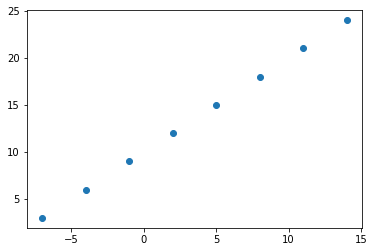

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0,14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y); 

In [16]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [17]:
# Create a demo tensors for housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([979300])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([979300], dtype=int32)>)

In [18]:
# Turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # These both are scalers (no shape)

(TensorShape([]), TensorShape([]))

In [20]:
# Let's take a look at the single example individually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

## Steps in modelling with Tensorflow

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae -- Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), #SGD -- Stochasic Gradient Descent
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 716ms/step - loss: 9.4992 - mae: 9.4992
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 9.3667 - mae: 9.3667
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 9.2342 - mae: 9.2342
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 9.1017 - mae: 9.1017
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 8.9692 - mae: 8.9692
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 8.8367 - mae: 8.8367
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 8.7042 - mae: 8.7042
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 8.5717 - mae: 8.5717
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 8.4392 - mae: 8.4392
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 8.3067 - mae: 8.3067


In [22]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
# Make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 134ms/step


array([[25.482317]], dtype=float32)

## Improving our model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [24]:
# Rebuild our model

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 428ms/step - loss: 20.4410 - mae: 20.4410
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 20.1597 - mae: 20.1597
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 19.8785 - mae: 19.8785
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 19.5972 - mae: 19.5972
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 19.3160 - mae: 19.3160
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 19.0347 - mae: 19.0347
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 18.7535 - mae: 18.7535
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 18.4722 - mae: 18.4722
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 18.1910 - mae: 18.1910
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9097 - mae: 17.9097
Epoch 11/100
1/1 [==============================

In [25]:
# Make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 85ms/step


array([[29.243334]], dtype=float32)

In [26]:
#1. Create a model (with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 852ms/step - loss: 13.1834 - mae: 13.1834
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 12.6617 - mae: 12.6617
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.1377 - mae: 12.1377
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.6055 - mae: 11.6055
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0685 - mae: 11.0685
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5114 - mae: 10.5114
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9315 - mae: 9.9315
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.3236 - mae: 9.3236
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6842 - mae: 8.6842
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0090 - mae: 8.0090
Epoch 11/100
1/1 [==============================] - 0s 1

In [27]:
# Make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 81ms/step


array([[32.465496]], dtype=float32)

In [28]:
#1. Create a model (with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
              metrics=['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 599ms/step - loss: 13.5927 - mae: 13.5927
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8997 - mae: 12.8997
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.2037 - mae: 12.2037
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.5041 - mae: 11.5041
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7995 - mae: 10.7995
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0875 - mae: 10.0875
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 9.3654 - mae: 9.3654
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 8.6303 - mae: 8.6303
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.8789 - mae: 7.8789
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 7.1083 - mae: 7.1083
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [29]:
# Make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 104ms/step


array([[26.57332]], dtype=float32)

# Larger datasets

In [30]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

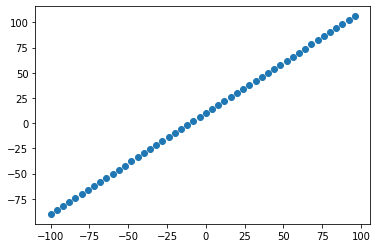

In [32]:
plt.scatter(X,y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [33]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

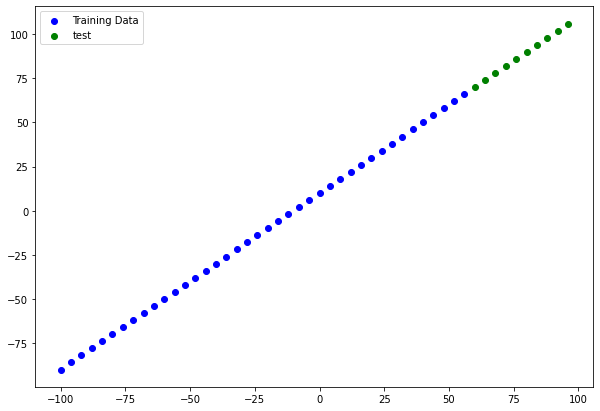

In [34]:
#Visualizing the data

plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,y_train,c='b',label='Training Data')
# Plot testing data in green
plt.scatter(X_test,y_test,c='g',label='test')
#Show a legend
plt.legend();

In [35]:
# Create a model

model  = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=['mae'],
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
#model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [37]:
model.summary()

ValueError: ignored

In [38]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(loss=['mae'],
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [40]:
# fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=0)

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


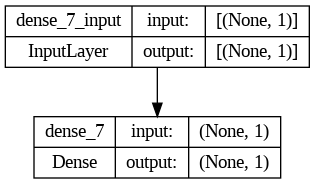

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

# Visualising

In [43]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 68ms/step


array([[54.970757],
       [58.5401  ],
       [62.109444],
       [65.67879 ],
       [69.24812 ],
       [72.81747 ],
       [76.38681 ],
       [79.956154],
       [83.5255  ],
       [87.09484 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
def plot_functions(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   predictions=y_pred ):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b',label='Training Data')
  plt.scatter(test_data,test_labels, c='g',label='Testing Data')  
  plt.scatter(test_data,predictions,c='r',label='Predictions')
  plt.legend();

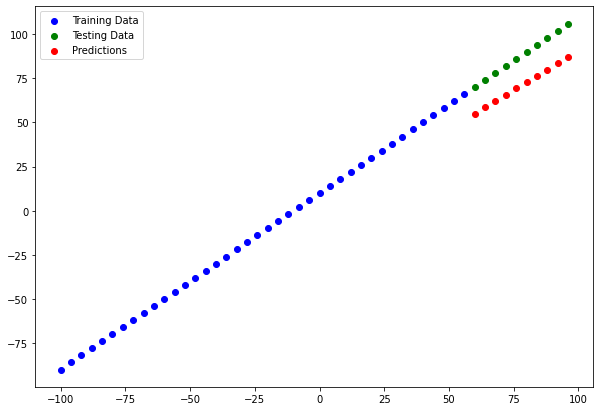

In [46]:
plot_functions(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   predictions=y_pred )

## Evaluating Predictions

In [47]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 189ms/step - loss: 16.9672 - mae: 16.9672


[16.96720314025879, 16.96720314025879]

In [48]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.029243, 29.4599  , 25.890558, 22.321213, 18.751877, 15.746027,
       13.367914, 11.617538, 10.494901, 10.      ], dtype=float32)>

In [49]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [50]:
y_pred

array([[54.970757],
       [58.5401  ],
       [62.109444],
       [65.67879 ],
       [69.24812 ],
       [72.81747 ],
       [76.38681 ],
       [79.956154],
       [83.5255  ],
       [87.09484 ]], dtype=float32)

In [51]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([54.970757, 58.5401  , 62.109444, 65.67879 , 69.24812 , 72.81747 ,
       76.38681 , 79.956154, 83.5255  , 87.09484 ], dtype=float32)>

In [52]:
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=16.967203>

In [53]:
# Calculate Mean Square Error
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=289.41608>

In [54]:
def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model:
model_1.compile(loss=['mae'],
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# 3. Fit the model:
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 67.0033 - mae: 67.0033
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 31.8732 - mae: 31.8732
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8294 - mae: 9.8294
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0216 - mae: 12.0216
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0834 - mae: 11.0834
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2386 - mae: 10.2386
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2484 - mae: 9.2484
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1744 - mae: 9.1744
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8006 - mae: 11.8006
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 13.7279 - mae: 13.7279
Epoch 11/100
2/2 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 82ms/step


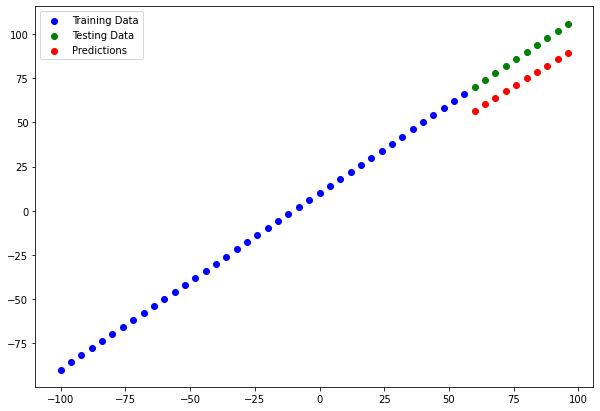

In [56]:
y_pred_1 = model_1.predict(X_test)
plot_functions(predictions=y_pred_1)

In [57]:
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.95621>,
 <tf.Tensor: shape=(), dtype=float32, numpy=224.53267>)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [58]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)  #Second layer
])

# 2. Compile the model
model_2.compile(loss=['mae'],
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 71ms/step


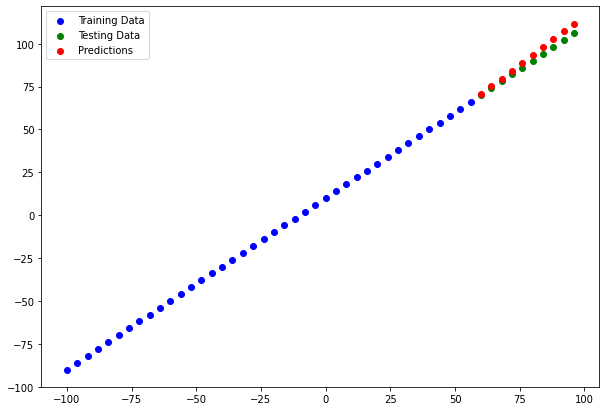

In [59]:
y_pred_2 = model_2.predict(X_test)
plot_functions(predictions=y_pred_2)

In [60]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.0702546>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.220525>)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [61]:
#Set random seed:
tf.random.set_seed(42)

# 1. create a model:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=['mae'],
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

#3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 63ms/step


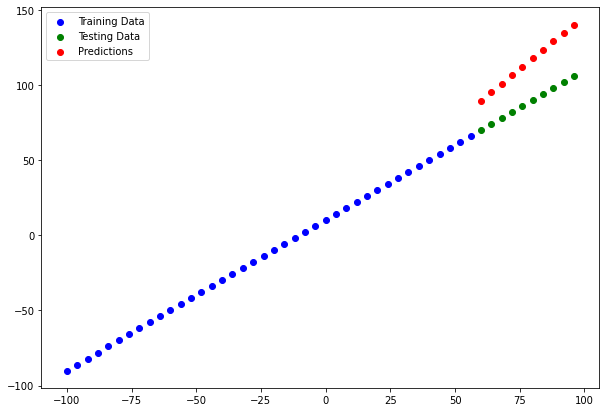

In [62]:
y_pred_3 = model_3.predict(X_test)
plot_functions(predictions=y_pred_3)

In [63]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=27.262354>,
 <tf.Tensor: shape=(), dtype=float32, numpy=765.06635>)

In [64]:
import pandas as pd

In [65]:
model_results = [['model_1',mae_1.numpy(),mse_1.numpy()],
                 ['model_2',mae_2.numpy(),mse_2.numpy()],
                 ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['models','mae','mse'])
all_results

,models,mae,mse
0,model_1,14.956210,224.532669
1,model_2,3.070255,12.220525
2,model_3,27.262354,765.066345


## Saving our models

In [66]:
# Save model using the SaveModel format

model_1.save('best_model_SavedModel_format')

In [67]:
# Save model using the HDF5 format

model_1.save('best_model_HDF5_format.h5')

## Loading a Model

In [68]:
load_Saved_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
load_Saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_1.preds = model_1.predict(X_test)
load_Saved_model_preds = load_Saved_model.predict(X_test)

model_1.preds == load_Saved_model_preds

1/1 [==============================] - 0s 64ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model (from Colab)

In [71]:
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example 

In [72]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
df_one_hot = pd.get_dummies(insurance)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [75]:
X = df_one_hot.drop('charges',axis=1)
y = df_one_hot['charges']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=['mae'],
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8660.0361 - mae: 8660.0361
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7870.4722 - mae: 7870.4722
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7502.7837 - mae: 7502.7837
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7788.2773 - mae: 7788.2773
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7691.5669 - mae: 7691.5669
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7645.2495 - mae: 7645.2495
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7547.3540 - mae: 7547.3540
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7737.2891 - mae: 7737.2891
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7549.0103 - mae: 7549.0103
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7731.2090 - mae: 7731.2090

In [78]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6922.0942 - mae: 6922.0942


[6922.09423828125, 6922.09423828125]

In [79]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [80]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=['mae'],
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13295.0146 - mae: 13295.0146
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13140.0645 - mae: 13140.0645
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12810.1074 - mae: 12810.1074
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12157.5723 - mae: 12157.5723
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11063.5732 - mae: 11063.5732
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9657.5811 - mae: 9657.5811
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8330.3438 - mae: 8330.3438
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7614.5479 - mae: 7614.5479
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7471.3169 - mae: 7471.3169
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7447.5444 - mae:

In [81]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4907.8311 - mae: 4907.8311


[4907.8310546875, 4907.8310546875]

In [82]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=['mae'],
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

history = insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13294.5566 - mae: 13294.5566
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13137.5059 - mae: 13137.5059
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12795.8516 - mae: 12795.8516
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12117.6475 - mae: 12117.6475
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10977.6943 - mae: 10977.6943
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9511.7939 - mae: 9511.7939
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8165.3213 - mae: 8165.3213
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7511.8730 - mae: 7511.8730
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7403.6660 - mae: 7403.6660
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7384.0151 - mae:

In [83]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3500.0535 - mae: 3500.0535


[3500.053466796875, 3500.053466796875]

Text(0, 0.5, 'epochs')

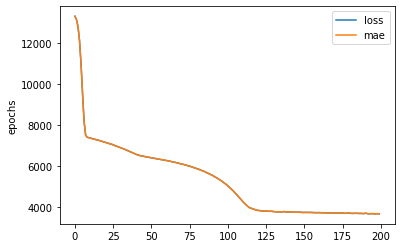

In [84]:
# Plot history (aka loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.ylabel('epochs')

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks we'll tend to favour normalization** as they tend to prefer values between 0 and 1 (we'll see this espcially with image processing), however, one will often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).



In [85]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

In [86]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [87]:
# Create Column Transformer
ct = make_column_transformer(
     (MinMaxScaler(), ['age','bmi','children',]),  # get all values between 0 and 1
     (OneHotEncoder(), ['sex','smoker','region']))

# Create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Buid train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [88]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [89]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [90]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [91]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=['mae'],
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.8662 - mae: 13343.8662
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.9131 - mae: 13335.9131
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13316.5225 - mae: 13316.5225
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13275.8779 - mae: 13275.8779
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13202.9961 - mae: 13202.9961
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13086.6680 - mae: 13086.6680
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12916.2500 - mae: 12916.2500
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12681.3545 - mae: 12681.3545
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12371.6348 - mae: 12371.6348
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11981.16

In [92]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3442.1157 - mae: 3442.1157


[3442.11572265625, 3442.11572265625]

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).